In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Завантаження даних

In [12]:
data_2d = pd.read_csv('data_2/data_2d.csv', header=None)
mnist = pd.read_csv('data_2/mnist.csv', header=None)

Застосування K-means до двовимірного датасету

In [13]:
kmeans_2d = KMeans(n_clusters=3)
kmeans_2d.fit(data_2d)

c:\Users\yerko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Визначення оптимальної кількості кластерів для mnist

In [14]:
inertia_values = []
for i in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=i)
    kmeans_mnist.fit(mnist)
    inertia_values.append(kmeans_mnist.inertia_)

c:\Users\yerko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yerko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yerko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yerko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Візуалізація ліктевого методу для mnist

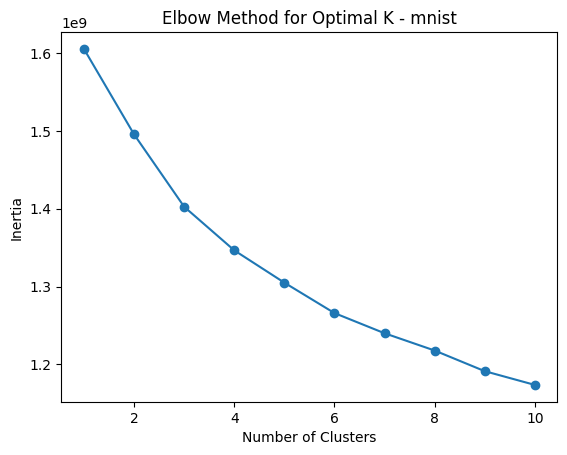

In [15]:
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K - mnist')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Обрання оптимальної кількості кластерів для mnist (з ліктевого методу)

In [16]:
optimal_k_mnist = 3

Застосування K-means до mnist

In [17]:
kmeans_mnist = KMeans(n_clusters=optimal_k_mnist)
kmeans_mnist.fit(mnist)

c:\Users\yerko\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Візуалізація результатів для двовимірного датасету

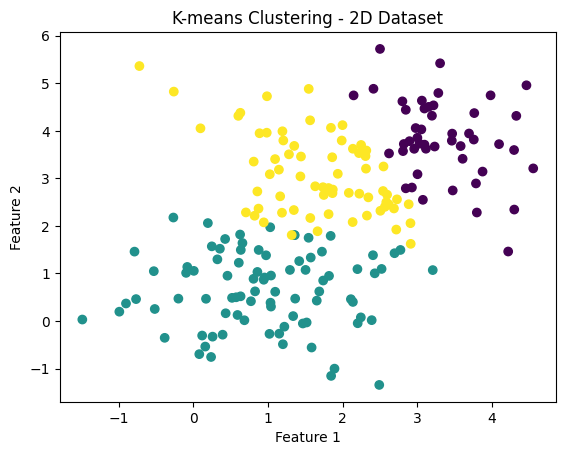

In [18]:
plt.scatter(data_2d[1], data_2d[2], c=kmeans_2d.labels_, cmap='viridis')
plt.title('K-means Clustering - 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Візуалізація результатів для mnist (перші дві фічі)

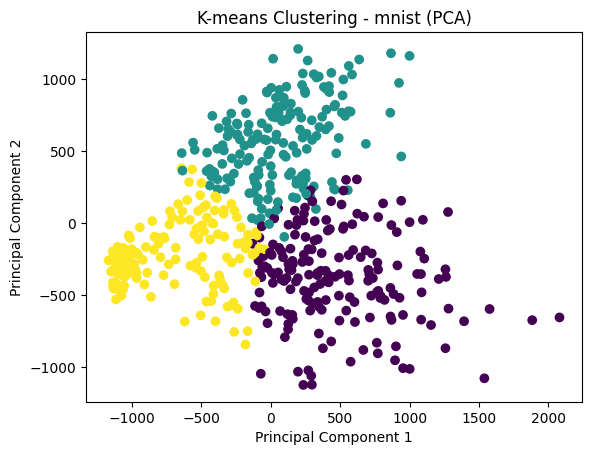

In [22]:
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist)

plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=kmeans_mnist.labels_, cmap='viridis')
plt.title('K-means Clustering - mnist (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()